In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import string
import math

## Chapter 13 - Case study: data structure selection

**Exercise 13.1.** Write a program that reads a file, breaks each line into words, strips whitespace and punctuation from the words, and converts them to lowercase.

*Hint:* The string module provides a string named whitespace, which contains space, tab, newline, etc., and punctuation which contains the punctuation characters. Let’s see if we can make Python swear:

Also, you might consider using the string methods strip, t and translate.

In [2]:
def get_words(text, with_spaces=True, word_list=False):
    if with_spaces or word_list:
        whitespace = string.whitespace[1:]
    else:
        whitespace = string.whitespace
    tableWS = str.maketrans({key: None for key in whitespace})
    tableP = str.maketrans({key: None for key in string.punctuation})
    lines = [line.translate(tableWS) for line in open(text, errors='ignore')]
    lines = [line.translate(tableP).lower() for line in lines]
    if word_list:
        words = []
        for line in lines:
            words.extend(line.split(' '))
            words = [word for word in words if word!='']
        #words = [line.split(" ") for line in lines]
        return words
    return lines

In [3]:
lines = get_words('data/words2.txt', with_spaces=True, word_list=False)
#this doesn't work with the gutenberg text, can't pinpoint why.
lines[2]

'holy cow im bart simpsapins'

**Exercise 13.2.** Go to Project Gutenberg (http://gutenberg.org) and download your favorite out-of-copyright book in plain text format.

Modify your program from the previous exercise to read the book you downloaded, skip over the header information at the beginning of the file, and process the rest of the words as before.

Then modify the program to count the total number of words in the book, and the number of times each word is used.

Print the number of different words used in the book. Compare different books by different authors, written in different eras. Which author uses the most extensive vocabulary?

In [4]:
words = get_words('data/xmas.txt', word_list=True)

In [5]:
def process(f, 
            skip_head = True):
    text = open(f, errors='ignore')
    if skip_head:
        skip_header(text)
    return text

def skip_header(text):
    for line in text:
        if '***' in line:
            break

In [6]:
text = process('data/xmas.txt')

In [7]:
#get_words(text)

In [8]:
def get_lines(text):
    tableWS = str.maketrans({key: None for key in string.whitespace[1:]})
    tableP = str.maketrans({key: None for key in string.punctuation})
    lines = [line.translate(tableWS) for line in text]
    lines = [line.translate(tableP).lower() for line in lines]
    lines = [line for line in lines if line!='']
    return lines

In [9]:
def get_words(lines):
    words = []
    for line in lines:
        words.extend(line.split(' '))
        #words = [word for word in words if word!='']
    words = [word for word in words if not has_number(word)]
    return words

In [10]:
def get_word_count(words):
    word_counts = defaultdict(int)
    for word in words:
        word_counts[word] += 1
    return word_counts

In [11]:
def get_total_words(words):
    return len(words)

In [12]:
def number_of_unique_words(words, return_words = False):
    if return_words:
        return (len(set(words)), set(words))
    return len(set(words))

In [17]:
def has_number(word):
    if word.isdigit():
        return True
    nums = [str(x) for x in range(10)]
    for num in nums:
        if num in word:
            return True
    return False

def book_process(f):
    text = process(f)
    lines = get_lines(text)
    words = get_words(lines)
    word_count = get_word_count(words)
    total_words = get_total_words(words)
    total_unique, unique_words = number_of_unique_words(words, True)
    return(words, word_count, total_words, total_unique, unique_words)

In [18]:
words, word_count, total_words, total_unique, unique_words = book_process('data/xmas.txt')

**Exercise 13.3.** Modify the program from the previous exercise to print the 20 most frequently used words in the book.

In [19]:
def inverse_dict(d):
    inverse = {}
    for key in d:
        val = d[key]
        inverse.setdefault(val, key)
    return inverse


def top_twenty(word_counts):
    top_20 = []
    counts = inverse_dict(word_counts)
    top_20_vals = sorted(counts.keys(), reverse=True)[:21]
    for val in top_20_vals:
        top_20.append((counts[val], val))
    return top_20       

In [20]:
top_twenty(word_count)

[('the', 1739),
 ('and', 1117),
 ('of', 773),
 ('a', 756),
 ('to', 738),
 ('in', 575),
 ('it', 525),
 ('he', 487),
 ('was', 428),
 ('his', 420),
 ('that', 350),
 ('i', 331),
 ('scrooge', 314),
 ('with', 312),
 ('you', 299),
 ('', 297),
 ('as', 234),
 ('for', 222),
 ('said', 221),
 ('had', 204),
 ('not', 197)]

**Exercise 13.4.** Modify the previous program to read a word list (see Section 9.1) and then print all the words in the book that are not in the word list. How many of them are typos? How many of them are common words that should be in the word list, and how many of them are really obscure?

In [21]:
def word_list():
    word_list = []
    fin = open('data/words.txt')
    for line in fin:
        word = line.strip()
        word_list.append(word)
    return sorted(word_list)
   
def obscure_words(unqiue_words, word_list):
    obscure = []
    for word in unqiue_words:
        if len(word) <= 1 or has_number(word):
            pass
        elif word not in word_list:
            obscure.append(word)
    return obscure        

In [22]:
word_list_ = word_list()
obscure = obscure_words(unique_words, word_list_)

Given the same inputs, most computer programs generate the same outputs every time, so they are said to be **deterministic**. Determinism is usually a good thing, since we expect the same calculation to yield the same result. For some applications, though, we want the computer to be unpredictable.

Making a program truly nondeterministic turns out to be difficult, but there are ways to make it at least seem nondeterministic. One of them is to use algorithms that generate **pseudorandom numbers**.

The function **random** returns a random float between 0.0 and 1.0 (including 0.0 but not 1.0). Each time you call random, you get the next number in a long series.

In [23]:
import random

for i in range(10):
    x = random.random()
    print(x)

0.2177464121613264
0.6732451804687771
0.6425071619320913
0.9584744907363183
0.4731279904389132
0.9471172590828456
0.36328945994286266
0.6609954046181735
0.4206971744766994
0.7943144970304443


The function **randint** takes parameters low and high and returns an integer between low and high (including both).

In [24]:
print(random.randint(5, 10))
print(random.randint(5, 10))

6
8


To choose an element from a sequence at random, you can use **choice**:

In [25]:
t = [1, 2, 3]
print(random.choice(t))
print(random.choice(t))

2
2


**Exercise 13.5.** Write a function named choose_from_hist that takes a histogram as defined in Section 11.2 and returns a random value from the histogram, chosen with probability in proportion to frequency.

In [26]:
def random_histogram():
    s = [random.randint(0,100) for i in range(0,1000)]
    d = defaultdict(int)
    for c in s:
        d[c] += 1
    return d

In [27]:
hist = random_histogram()

In [28]:
def choose_rand_hist(hist):
    vals = []
    for key in list(hist.keys()):
        vals.extend([key for i in range(0,hist[key])])
    return random.choice(vals)

In [29]:
choose_rand_hist(hist)

8

**Exercise 13.6.** Python provides a data structure called set that provides many common set operations. Write a program that uses set subtraction to find words in the book that are not in the word list.

In [30]:
def obscure_words2(unique_words, word_list):
    return unique_words - set(word_list)

In [31]:
obscure2 = obscure_words2(unique_words, word_list_) #doesn't account for numbers, much faster though

This algorithm for random word above works, but it is not very efficient; each time you choose a random word, it rebuilds the list, which is as big as the original book. An obvious improvement is to build the list once and then make multiple selections, but the list is still big.

An alternative is:
1. Use keys to get a list of the words in the book.
2. Build a list that contains the cumulative sum of the word frequencies (see Exercise 10.2). The last item in this list is the total number of words in the book, n.
3. Choose a random number from 1 to n. Use a bisection search (See Exercise 10.10) to find the index where the random number would be inserted in the cumulative sum.
4. Use the index to find the corresponding word in the word list.

**Exercise 13.7.** Write a program that uses this algorithm to choose a random word from the book.

In [32]:
def word_freqs(hist):
    words = []
    freqs = []
    total_freq = 0
    for word, freq in hist.items():
        total_freq += freq
        words.append(word)
        freqs.append(total_freq)
    return words, freq

def random_word(hist):
    words, freq = word_freqs(hist)
    x = random.randint(0, total_freq-1)
    index = bisect(freqs, x)
    return words[index]

If you choose words from the book at random, you can get a sense of the vocabulary, but you probably won’t get a sentence.

A series of random words seldom makes sense because there is no relationship between successive words. For example, in a real sentence you would expect an article like “the” to be followed by an adjective or a noun, and probably not a verb or adverb.

One way to measure these kinds of relationships is **Markov analysis**, which characterizes, for a given sequence of words, the probability of the words that might come next. For example, the song Eric, the Half a Bee begins:

Half a bee, philosophically,

Must, ipso facto, half not be.

But half the bee has got to be

Vis a vis, its entity. D’you see?



But can a bee be said to be

Or not to be an entire bee

When half the bee is not a bee

Due to some ancient injury?

In this text, the phrase “half the” is always followed by the word “bee”, but the phrase “the bee” might be followed by either “has” or “is”.

The result of **Markov analysis** is a mapping from each prefix (like “half the” and “the bee”) to all possible suffixes (like “has” and “is”).

Given this mapping, you can generate a random text by starting with any prefix and choosing at random from the possible suffixes. Next, you can combine the end of the prefix and the new suffix to form the next prefix, and repeat.

For example, if you start with the prefix “Half a”, then the next word has to be “bee”, because the prefix only appears once in the text. The next prefix is “a bee”, so the next suffix might be “philosophically”, “be” or “due”.

In this example the length of the prefix is always two, but you can do **Markov analysis** with any prefix length.

**Exercise 13.8.** Markov analysis:
    
Write a program to read a text from a file and perform Markov analysis. The result should be a dictionary that maps from prefixes to a collection of possible suffixes. The collection might be a list, tuple, or dictionary; it is up to you to make an appropriate choice. You can test your program with prefix length two, but you should write the program in a way that makes it easy to try other lengths.

In [33]:
words, _, _, _, _ = book_process('data/xmas.txt')

In [34]:
words[0] + ' ' + words[1] +':'+ words[2]
len(words)
words[len(words)-2]

'new'

In [35]:
def markov(text, prefix_length=2):
    markov_dict = defaultdict(list)
    words, _, _, _, _ = book_process(text)
    for i in range(0, len(words)-(prefix_length+1)):
        markov_dict[words[i]+" "+words[i+(prefix_length-1)]].append(words[i+prefix_length])
    for pre, suf in markov_dict.items():
        markov_dict[pre] = list(set(suf))
    return markov_dict   

In [36]:
markov_dic = markov('data/xmas.txt')

In [37]:
#markov_dic

Add a function to the previous program to generate random text based on the Markov analysis.

In [38]:
def generate_text(text, prefix_length=2, num_chracters=1000):
    markov_dict = markov(text, prefix_length)
    text = ''
    prefix = random.choice(list(markov_dict.keys()))
    suffix = random.choice(markov_dict[prefix])
    text += (prefix+' '+suffix)
    while len(text) < num_chracters:
        prefix = prefix.split(" ")[1]+" "+suffix
        suffix = random.choice(markov_dict[prefix])
        text += (' '+suffix)
    return text

In [39]:
generate_text('data/xmas.txt')

'beware this boy is ignorance this girl is want beware them both and all the cratchit family drew round the fireplace was an excellent man of a very very brief replied the woman thats enough whos the wiser were not well dressed their shoes were far from being waterproof their clothes were scanty and peter might have withered said the gentleman a few pounds of your family said scrooge in a bakers doorway and taking the old mans lamp he viewed them with boys upon their breasts and stamping their feet upon the counter made a dash and did it is thus with what you show me the spirit but they were perfectly motionless its hair was curiously stirred as if with age and yet that face of marley seven years ago he might see him disappointed if it cost a fortune he felt that in the fire until the chime had gone three but it seemed as if some person were dragging a heavy sleep stave iii the second of her downcast eyes and never better than at christmas and now and dreary enough for such a user to r

**Debugging**

When you are debugging a program, and especially if you are working on a hard bug,
there are five things to try:


**Reading:** Examine your code, read it back to yourself, and check that it says what you meant to say.


**Running:** Experiment by making changes and running different versions. Often if you display the right thing at the right place in the program, the problem becomes obvious, but sometimes you have to build scaffolding.

**Ruminating:** Take some time to think! What kind of error is it: syntax, runtime, or semantic? What information can you get from the error messages, or from the output of the program? What kind of error could cause the problem you’re seeing? What did you change last, before the problem appeared?


**Rubberducking:** If you explain the problem to someone else, you sometimes find the answer before you finish asking the question. Often you don’t need the other person; you could just talk to a rubber duck. And that’s the origin of the wellknown strategy called rubber duck debugging. I am not making this up; see https://en.wikipedia.org/wiki/Rubber_duck_debugging.


**Retreating:** At some point, the best thing to do is back off, undoing recent changes, until you get back to a program that works and that you understand. Then you can start rebuilding.

### Glossary

**deterministic:** Pertaining to a program that does the same thing each time it runs, given the same inputs.


**pseudorandom:** Pertaining to a sequence of numbers that appears to be random, but is generated by a deterministic program.


**default value:** The value given to an optional parameter if no argument is provided.


**override:** To replace a default value with an argument.


**benchmarking:** The process of choosing between data structures by implementing alternatives and testing them on a sample of the possible inputs.


**rubber duck debugging:** Debugging by explaining your problem to an inanimate object such as a rubber duck. Articulating the problem can help you solve it, even if the rubber duck doesn’t know Python.

**Exercise 13.9.** The “rank” of a word is its position in a list of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.


Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages (http://en.wikipedia.org/wiki/Zipf's_law). Specifically, it predicts that the frequency, $f$, of the word with rank $r$ is:

$$f = cr^{-s}$$

where $s$ and $c$ are parameters that depend on the language and the text. If you take the logarithm of both sides of this equation, you get:

$$log(f) = log(c) - s\cdot log(r)$$

So if you plot $log (f)$ versus $log (r)$, you should get a straight line with slope $-s$ and intercept $log (c)$.

Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending order of frequency, with $log (f)$ and $log (r)$. Use the graphing program of your choice to plot the results and check whether they form a straight line. Can you estimate the value of
$s$?

In [40]:
def zipfs_law(word_count):
    freqs = list(word_count.values())
    freqs.sort(reverse=True)
    rf = [((r+1),f) for r,f in enumerate(freqs)]
    return rf

In [41]:
def plot_ranks(rank_freqs, scale='log'):
    """Plots frequency vs. rank.

    hist: map from word to frequency
    scale: string 'linear' or 'log'
    """
    rs, fs = zip(*rank_freqs)

    plt.clf()
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title('Zipf plot')
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.plot(rs, fs, 'r-', linewidth=3)
    plt.show()

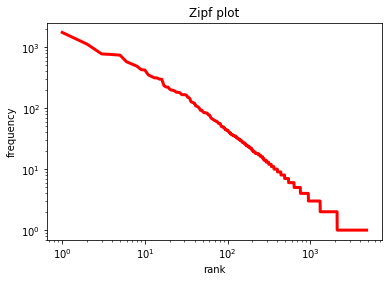

In [42]:
rf = zipfs_law(word_count)
plot_ranks(rf)